# Imports

In [89]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import sys

from src.SAX import meSAX, meSAXAugmented
from src.metrics import rmsre

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [5]:
df = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
df = df['Close'][:2500].values.squeeze()
df

[*********************100%***********************]  1 of 1 completed


array([ 6.44741249,  6.45855808,  6.3558259 , ..., 63.43809509,
       64.36880493, 65.61214447])

# meSAX experiments

K=5


121it [00:00, 42246.80it/s]


K=6


121it [00:00, 51776.25it/s]


K=7


121it [00:00, 18763.34it/s]


K=8


121it [00:00, 59483.21it/s]


K=9


121it [00:00, 38049.99it/s]


K=10


121it [00:00, 56673.45it/s]


K=11


121it [00:00, 66375.99it/s]


K=12


121it [00:00, 64185.00it/s]

K=13



121it [00:00, 79597.05it/s]


K=14


121it [00:00, 71470.33it/s]


K=15


121it [00:00, 60984.23it/s]


K=16


121it [00:00, 69828.12it/s]


K=17


121it [00:00, 87366.29it/s]


K=18


121it [00:00, 64087.74it/s]


K=19


121it [00:00, 61013.56it/s]


K=20


121it [00:00, 64750.04it/s]


K=21


121it [00:00, 55074.42it/s]


K=22


121it [00:00, 77672.30it/s]


K=23


121it [00:00, 69341.55it/s]


K=24


121it [00:00, 75861.10it/s]


K=25


121it [00:00, 63249.10it/s]


K=26


121it [00:00, 50188.96it/s]


K=27


121it [00:00, 43152.01it/s]


K=28


121it [00:00, 38994.30it/s]


K=29


121it [00:00, 35544.95it/s]


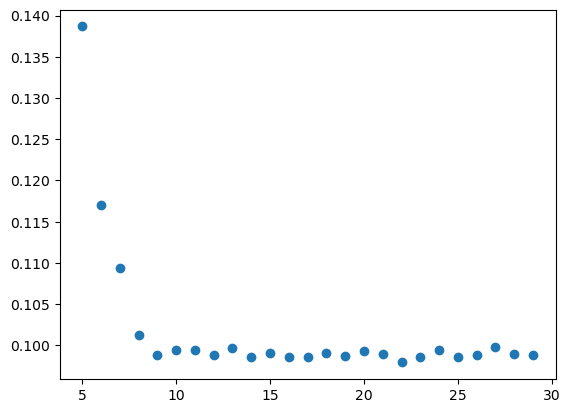

In [19]:
def eval(data, range_K):
    errors = []
    compressions = []
    for K in range_K:
        print(f"K={K}")
        sax = meSAX(K=K, windows_size=100, step_size=20)
        sax.synthesize(data)
        reconstructed_data = sax.reconstruct()

        errors.append(rmsre(data[:len(reconstructed_data)], reconstructed_data))
        compressions.append(sys.getsizeof(sax.symbol))

    return errors, compressions

errors, compressions = eval(df, range(5, 30))
plt.scatter(range(5, 30), errors)

# Test

496it [00:00, 25985.85it/s]


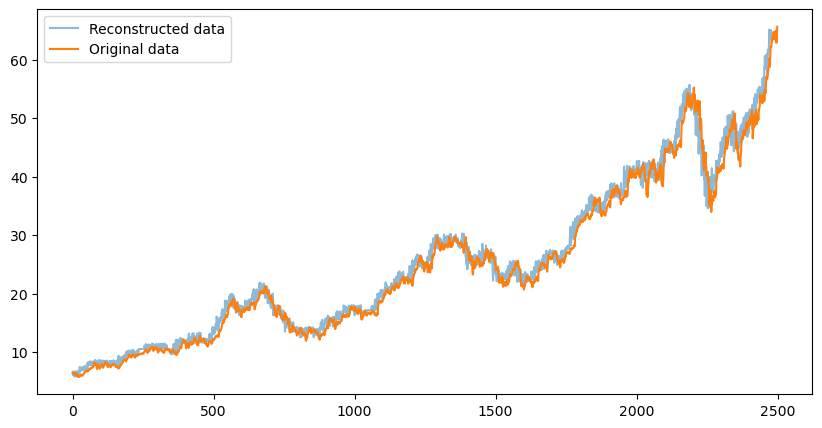

In [114]:
# Create the instances
sax = meSAX(K=6, windows_size=25, step_size=5)
# sax_augmented = meSAXAugmented(K=6, windows_size=100, step_size=5)

# Fit the instance
sax.synthesize(df)
# sax_augmented.synthesize(df)

# Reconstruct the data
reconstructed_data = sax.reconstruct()
# reconstructed_data_augmented = sax_augmented.reconstruct()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(reconstructed_data, label='Reconstructed data', alpha=0.5)
# plt.plot(reconstructed_data_augmented, label='Reconstructed data augmented', alpha=0.5)
plt.plot(df, label='Original data')
plt.legend()

In [115]:
sax.get_compression_ratio()

2.236

In [110]:
rmsre(df[:len(reconstructed_data)], reconstructed_data)

0.06052447927144662